<a href="https://colab.research.google.com/github/canderson564/TwitterNetwork/blob/main/Anderson_Twitter_Large_Mention_Networks_Moes_Tavern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Mention Networks

For this assignment, you need to use [Moe's Tavern](https://tavern.osome.iu.edu/) to do a hashtag search for tweets. You then have to produce mention networks of the conversation. You are encouraged to reuse code from past tutorials to help you with these exercises.

## Mention Network

Here we want to produce a **directed** graph of users **mentioning** each other tweets. When building a directed mention network, it's not necessary to first filter out tweets containing user mentions due to a feature of
[Tweet Objects](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object):
every tweet has
[Entities](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/entities-object#entitiesobject)
which always contains a `'user_mentions'` list, even if that list is empty. Since a tweet may mention more than one user, you will need a nested for-loop.

* 1. Do a search for a hashtag of your choosing, and retrieve at least 10,000 tweets. Show that you have at least 10,000 tweets.

* 2. For each tweet, if the tweet has a mention, add an edge **from the *mentioned* user to the *mentioning* user**.

* 3. Remove selfloop edges and then also subsequently remove singleton nodes. We didn't remove singletons in the tutorial, but you should do it here. Your graph should only contain nodes mentioning/mentioned by at least one other user.

* 4. Show how many nodes and edges are in this network.

* 5. Show the screen name of the user with:
  * highest in-degree
  * highest out-degree
   
    Also provide each of these degree values.

* 6. Draw this network

  * 6.1. Draw network two more times - first with nodes sized according to in-degree, and then with nodes sized according to out-degree

* 7. In the context of Twitter and Twitter users, what does it mean for a user to be a hub with high mention in-degree? What does it mean for a user to have high mention out-degree?

* 8. What proportion of the nodes in this network are *sinks* (i.e. nodes with zero out-degree)?

  * 8.1 What does it mean for a user to be a sink in this network?

* 9. What proportion of the nodes in this network are *sources* (i.e. nodes with zero in-degree)?

  * 9.1 What does it mean for a user to be a source in this network?

* 10. What proportion of the nodes in this network are in its largest weakly-connected component?

If the network doesn't have enough edges (use your best judgement), try again but with more tweets, e.g. 20,000 instead of 10,000 - or a different hashtag.

***Submit your python notebook and data files.***

In [ ]:
import gzip
import json
import os
#from class assignment
tweets = []
for file in os.listdir("/content/"):
    if file.endswith(".gz"):
        print(file)
        with gzip.open(file, 'rt') as zipfile:
            for line in zipfile.readlines():
              tweets.append(json.loads(line))

part-m-00001.gz
part-m-00000 (2).gz


## Exercise 1.

Do a search for a hashtag of your choosing, and retrieve at least 10,000 tweets. Show that you have at least 10,000 tweets.

In [ ]:
counter = 0
for i in tweets: #iterate through and add to counter
  counter += 1
counter

20520

# Exercise 2.

For each tweet, if the tweet has a mention, add an edge **from the *mentioned* user to the *mentioning* user**.


In [ ]:
mentions = []
#code from class excercise
# Loop through tweets
# If a tweet is mention
# append it to mentions list

for i in tweets:
  if 'entities' in i and 'user_mentions' in i['entities']: #user mentions are located in entities so we have to look for them in there
    mentions.append(i)
#mentions

In [ ]:
import networkx as nx
#code from class  adjusted for mentions
D = nx.DiGraph()

for mention in mentions:
    mentioning_user = mention['user']['screen_name'] #get the mentioning users screen name

    for mened_users in mention['entities']['user_mentions']: #get the screen name of the person being mentioned
        mened_user = mened_users['screen_name']

        # Edge direction: mentioned user -> mentioning user
        if D.has_edge(mened_user, mentioning_user):
            D.edges[mened_user, mentioning_user]['weight'] += 1
        else:
            D.add_edge(mened_user, mentioning_user, weight=1)
#nx.draw(D)
print('number of nodes =',D.number_of_nodes()) #check to make sure my isolate removal worked in excercie 4

number of nodes = 12291


# Exercise 3.

Remove selfloop edges and subsequently remove singleton nodes. We didn't remove singletons in the tutorial, but you should do it here. Your graph should not contain nodes that are not mentioning, or have not been mentioned by another user.


In [ ]:
D.remove_edges_from(nx.selfloop_edges(D))  #https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.selfloop_edges.html

isolates = list(nx.isolates(D)) #was getting an error so added vaariable because the graph was changing while trying to iterate through it
D.remove_nodes_from(isolates) #https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.isolate.isolates.html

# Exercise 4.

Show how many nodes and edges are in this network.


In [ ]:
print('number of nodes =',D.number_of_nodes())
print('number of edges =',D.number_of_edges())

number of nodes = 12246
number of edges = 15280


# Exercise 5.

Show the screen name of the user with:
  * highest in-degree
  * highest out-degree
   
Also provide each of these degree values - print this information out in a easily readable format - as demonstrated in the tutorial.


In [ ]:
# i am assuming we are taking weight of the edges into account

out_deg_user = max(D.nodes, key=D.out_degree(weight='weight')) #code discussed in class
in_deg_user = max(D.nodes, key =D.in_degree(weight = 'weight'))

out_deg = D.out_degree(out_deg_user, weight = 'weight')
in_deg = D.in_degree(in_deg_user, weight = 'weight')   #get the degree of node with highest in or out deg

print('Highest out-degree', out_deg_user, out_deg)
print('Highest in-degree', in_deg_user, in_deg)

Highest out-degree NFL_DovKleiman 1574
Highest in-degree jchrthomas 49


# Exercise 6.

Draw this network.




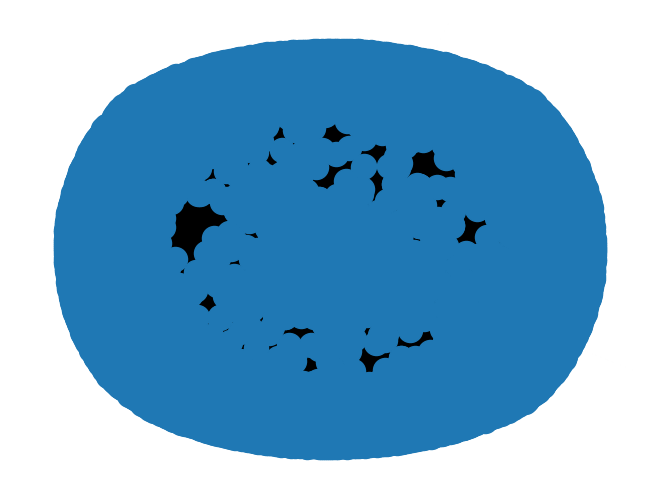

In [ ]:
nx.draw(D)

# Exercise 6.1

Draw the network two more times - first with nodes sized by in-degree, and then with nodes sized by out-degree.

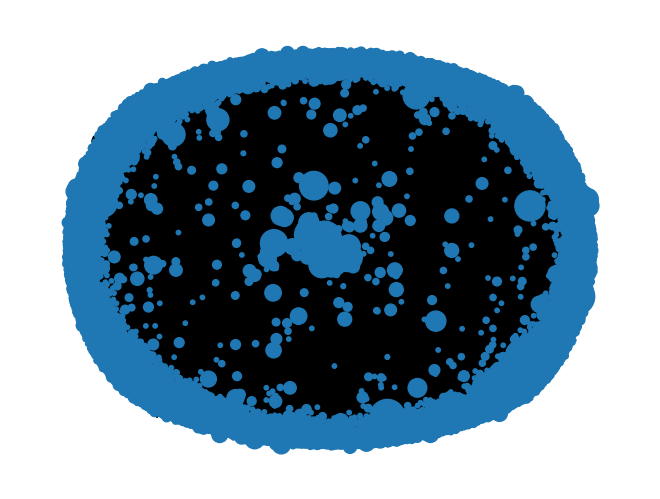

In [ ]:
node_sizes = [D.in_degree(n, weight='weight') * 10 for n in D.nodes]
#code from class
#in degree
%matplotlib inline
nx.draw(D, node_size=node_sizes)

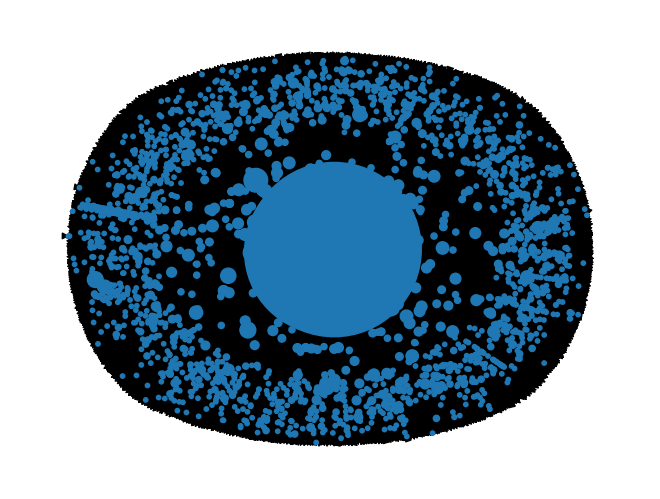

In [ ]:
node_sizes = [D.out_degree(n, weight='weight') * 10 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

# Exercise 7.

In the context of Twitter and Twitter users, what does it mean for a user to be a hub with high mention in-degree? What does it mean for a user to have high mention out-degree?


For high mention in-degree it means that they mention people in their tweets alot

for a high mention outdegree it means they are being mentioned frequently in other peoples tweets

# Exercise 8.

What proportion of the nodes in this network are *sinks* (i.e. nodes with zero out-degree)?


In [ ]:
counter = 0
for i in D.nodes(): #iterate through nodes in D
  if D.out_degree(i) == 0: #if the node has no outdegree add to counter
    counter += 1
#counter
print('proportion of sinks in the network =',counter/D.number_of_nodes())

proportion of sinks in the network = 0.7608198595459742


# Exercise 8.1

What does it mean for a user to be a sink in this network?

It means that they are not mentioned at all in other peoples tweets

# Exercise 9.

What proportion of the nodes in this network are *sources* (i.e. nodes with zero in-degree)?

In [ ]:
#same code as above just with in degree

counter = 0
for i in D.nodes(): #iterate through nodes in D
  if D.in_degree(i) == 0: #if the node has no outdegree add to counter
    counter += 1
#counter
print('proportion of sources in the network =',counter/D.number_of_nodes())

proportion of sources in the network = 0.19835048178997225


# Exercise 9

What does it mean for a user to be a source in this network?

It means they do not mention anyone in their tweets

# Exercise 10.

What proportion of the nodes in this network are in its largest weakly-connected component?

In [ ]:
#weak = nx.weakly_connected_components(D)
#list(weak)

#find the biggest weakly connected comp
max_weak = max(nx.weakly_connected_components(D), key = len) #https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.weakly_connected_components.html

nodes_in_weak = len(max_weak) #amount of nodes in max_weak
print(nodes_in_weak/D.number_of_nodes())

0.7670259676629103


***Be sure to submit your python notebook and data files.***